In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',None) # to display all rows & dots will remove
pd.set_option('display.max_columns',None) # to display all rows & dots will remove

In [3]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Evaluation Project Phase - Week 3 - (19-02)\Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.drop({'_c39','insured_zip','incident_date','insured_relationship','insured_hobbies','insured_sex','insured_education_level','policy_number','policy_bind_date','incident_location'},axis=1,inplace=True)

In [5]:
df["collision_type"]= df["collision_type"].replace("?","Front Collision")
df["property_damage"]= df["property_damage"].replace("?","NO")
df["police_report_available"]= df["police_report_available"].replace("?","NO")

In [6]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['policy_state']=LE.fit_transform(df['policy_state'])
df['insured_occupation']=LE.fit_transform(df['insured_occupation'])
df['incident_type']=LE.fit_transform(df['incident_type'])
df['collision_type']=LE.fit_transform(df['collision_type'])
df['incident_severity']=LE.fit_transform(df['incident_severity'])
df['authorities_contacted']=LE.fit_transform(df['authorities_contacted'])
df['incident_state']=LE.fit_transform(df['incident_state'])
df['incident_city']=LE.fit_transform(df['incident_city'])
df['property_damage']=LE.fit_transform(df['property_damage'])
df['police_report_available']=LE.fit_transform(df['police_report_available'])
df['auto_make']=LE.fit_transform(df['auto_make'])
df['fraud_reported']=LE.fit_transform(df['fraud_reported'])
df['auto_model']=LE.fit_transform(df['auto_model'])
df['policy_csl']=LE.fit_transform(df['policy_csl'])

In [7]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_occupation             0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_model                     0
auto_year                      0
fraud_reported                 0
dtype: int

In [8]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_occupation', 'capital-gains', 'capital-loss', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_occupation           1000 non-null   int32  
 8   capital-gains                1000 non-null   int64  
 9   capital-loss                 1000 non-null   int64  
 10  incident_type                1000 non-null   int32  
 11  collision_type               1000 non-null   int32  
 12  incident_severity            1000 non-null   int32  
 13  authorities_contact

In [10]:
df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_occupation,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,6.653000,25126.100000,-26793.700000,1.172000,0.844000,1.184000,2.167000,3.242000,2.966000,11.644000,1.83900,0.302000,0.992000,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,2.297407e+06,4.019048,27872.187708,28104.096686,1.081474,0.827253,0.939695,1.532142,2.155942,2.044266,6.951373,1.01888,0.459355,0.820127,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,3.000000,0.000000,-51500.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1.00000,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,7.000000,0.000000,-23250.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,12.000000,1.00000,0.000000,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,10.000000,51025.000000,0.000000,2.000000,2.000000,2.000000,4.000000,5.000000,5.000000,17.000000,3.00000,1.000000,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,13.000000,100500.000000,0.000000,3.000000,2.000000,3.000000,4.000000,6.000000,6.000000,23.000000,4.00000,1.000000,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


In [11]:
# Correlation
df.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_occupation,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.009814,0.006399,0.020209,-0.017377,-0.043489,-0.059581,0.010021,0.005369,-0.000130,0.070639,0.014736,0.005488,-0.010162,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.017220,-0.007075,0.007368,-0.025626,-0.045290,-0.058439,0.015417,0.005770,-0.002291,0.087161,0.022102,-0.003408,-0.015679,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,-0.031215,0.074551,-0.030338,0.031848,0.045410,-0.026377,-0.016777,0.008723,-0.002077,0.029457,-0.042263,-0.008465,0.013384,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,0.015788,0.005249,-0.034612,0.011997,-0.014505,0.022530,0.056182,0.032814,0.009333,-0.001869,-0.019403,-0.027634,-0.000595,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,-0.046733,0.035212,-0.023544,-0.038411,-0.045058,-0.015711,-0.000760,0.006517,-0.045117,0.060935,0.051214,0.015770,-0.022765,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.035922,-0.013738,0.023547,0.053603,0.039694,-0.011155,-0.055191,0.046434,0.048724,-0.001578,-0.045991,0.080738,0.026780,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.023422,-0.047268,-0.024056,0.015966,-0.012242,0.009466,0.029044,-0.077492,0.013094,-0.023257,-0.021270,-0.076358,0.022743,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_occupation,0.009814,0.017220,-0.031215,0.015788,-0.046733,0.035922,0.023422,1.000000,-0.007824,-0.020171,0.003842,0.007186,0.004731,-0.007811,-0.022761,0.000390,-0.018435,-0.015368,-0.016378,-0.000236,-0.014794,-0.025232,0.003692,0.020211,0.003004,-0.000829,0.042621,0.020584,-0.006676,0.001564
capital-gains,0.006399,-0.007075,0.074551,0.005249,0.035212,-0.013738,-0.047268,-0.007824,1.000000,-0.046904,-0.045857,0.010006,-0.013396,-0.044892,0.013833,-0.024989,-0.016406,0.061643,-0.000616,0.055829,-0.017651,-0.012939,0.015980,0.025934,-0.000779,0.015836,0.052014,0.036569,0.031398,-0.019173
capital-loss,0.020209,0.007368,-0.030338,-0.034612,-0.023544,0.023547,-0.024056,-0.020171,-0.046904,1.000000,0.026101,0.027718,-0.018647,0.025192,-0.048651,-0.038092,-0.025054,-0.014895,0.016981,-0.024418,-0.041330,-0.039256,-0.036060,-0.046060,-0.022863,-0.032665,-0.041658,-0.037288,-0.056615,-0.014863


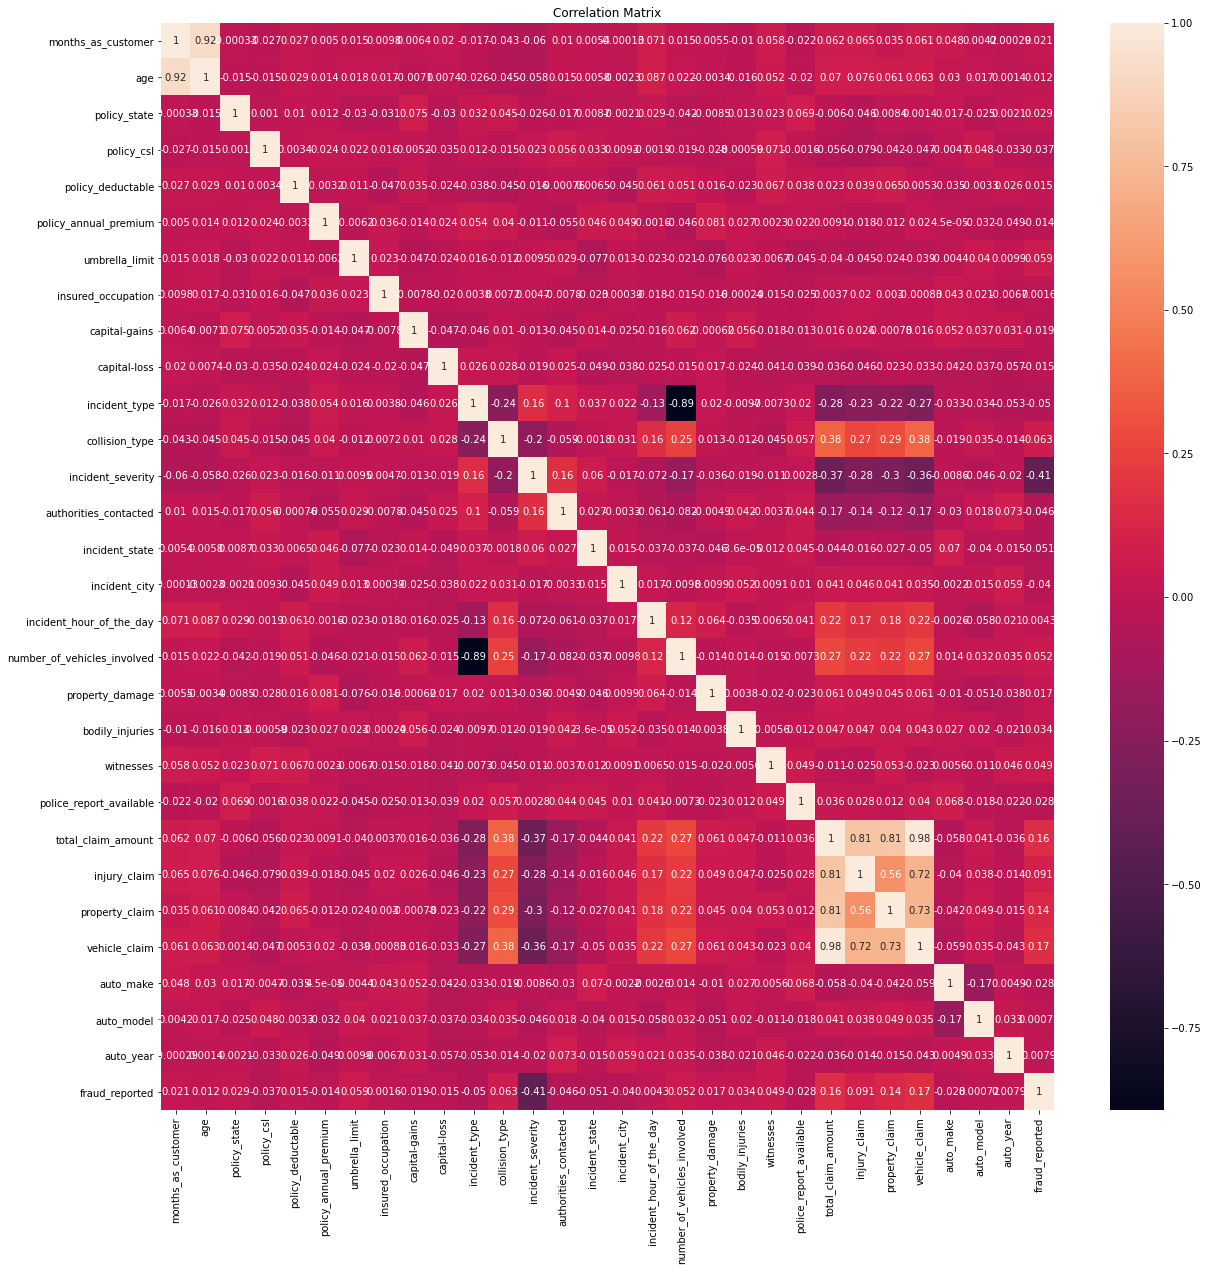

In [12]:
# Correlation Matrix - Heatmap
corr_mat=df.corr()
# Size of the canvas
plt.figure(figsize=[20,20])
#Plot Correlation Matrix
sns.heatmap(corr_mat,annot=True) # annot represnts each value encoded in heatmap
plt.title('Correlation Matrix')
plt.show()

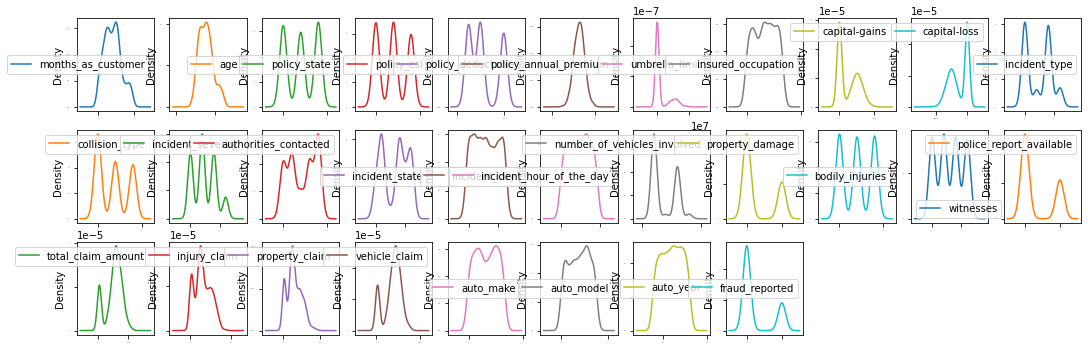

In [13]:
# Visualization
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,fontsize=1,figsize=(18,12))
plt.show()

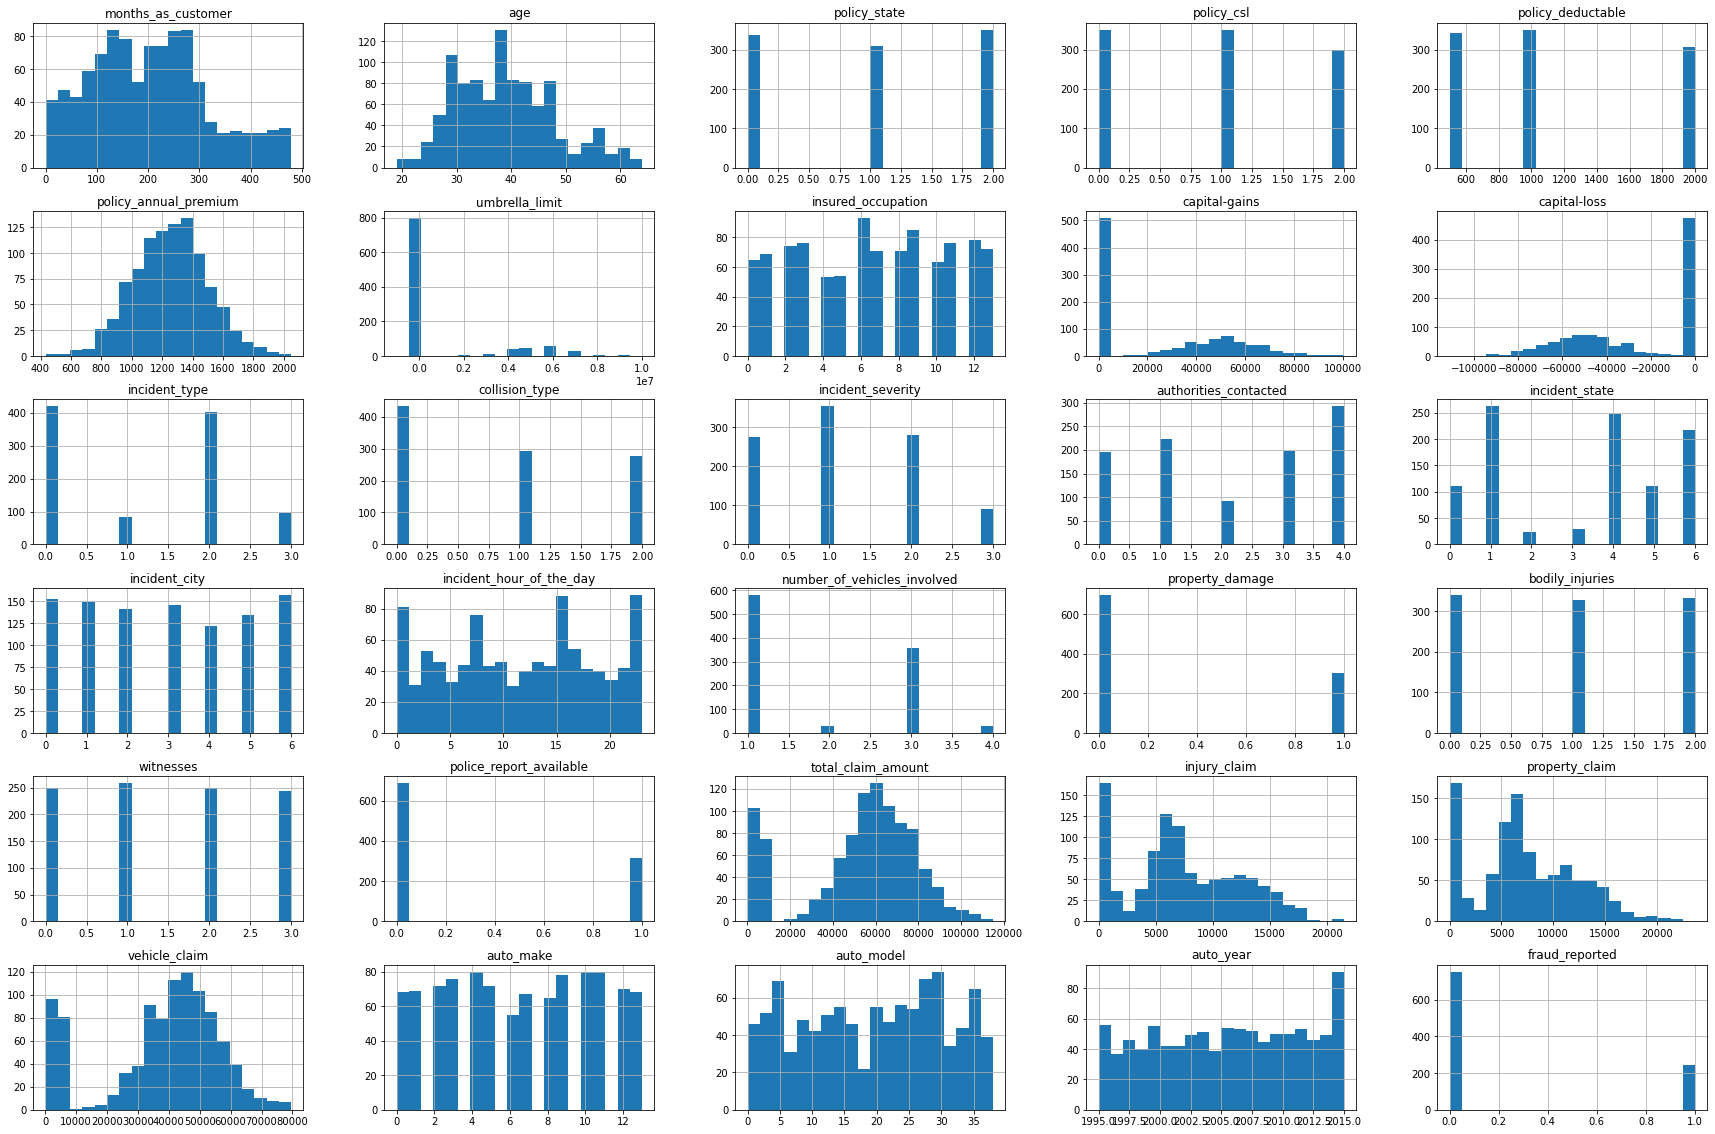

In [14]:
#plot histogram data vizualization
df.hist(bins=20,figsize=(30,20))
#plot showing
plt.show()

In [15]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [16]:
x.skew().sort_values()

vehicle_claim                 -0.621098
total_claim_amount            -0.594582
capital-loss                  -0.391472
incident_state                -0.148865
authorities_contacted         -0.121744
auto_model                    -0.080773
insured_occupation            -0.058881
auto_year                     -0.048289
incident_hour_of_the_day      -0.035584
policy_state                  -0.026177
auto_make                     -0.018797
policy_annual_premium          0.004402
bodily_injuries                0.014777
witnesses                      0.019636
incident_city                  0.049531
policy_csl                     0.088928
incident_type                  0.101507
injury_claim                   0.264811
incident_severity              0.279016
collision_type                 0.297203
months_as_customer             0.362177
property_claim                 0.378169
policy_deductable              0.477887
capital-gains                  0.478850
age                            0.478988


In [17]:
# Removing the Skweness of the data
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [18]:
x.skew().sort_values(ascending=False) # For descending

property_damage                0.863806
police_report_available        0.802728
number_of_vehicles_involved    0.363693
capital-loss                   0.090488
capital-gains                  0.038722
policy_deductable              0.023988
collision_type                 0.019449
policy_annual_premium          0.004758
age                           -0.001945
auto_year                     -0.012491
incident_severity             -0.079282
incident_type                 -0.088766
policy_csl                    -0.100769
bodily_injuries               -0.128799
months_as_customer            -0.135661
policy_state                  -0.145377
witnesses                     -0.153648
incident_city                 -0.181772
authorities_contacted         -0.227269
auto_make                     -0.227539
insured_occupation            -0.239336
incident_state                -0.255777
incident_hour_of_the_day      -0.256957
auto_model                    -0.278611
property_claim                -0.358814


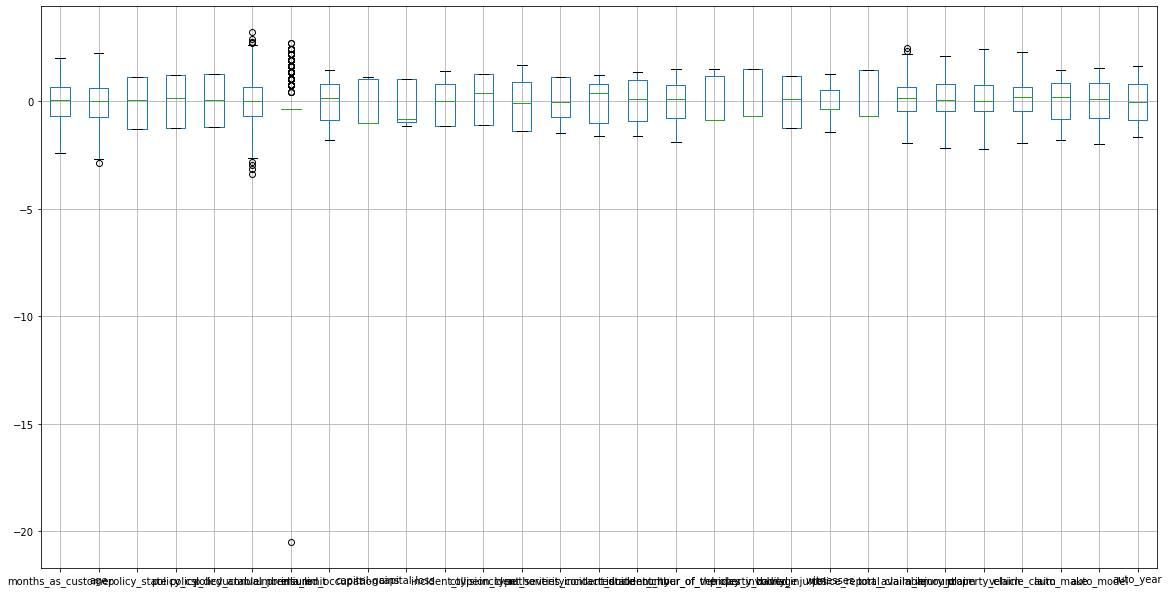

In [19]:
# Checking Outliers
# Plot boxplot
x.boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.10)
plt.show()

In [20]:
# Removing Outliers

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape

(1000, 29)

In [22]:
threshold=2.3
print(np.where(z>2.3))

(array([ 11,  11,  43,  63,  88, 115, 133, 149, 229, 246, 248, 267, 278,
       290, 318, 348, 368, 379, 387, 422, 430, 457, 458, 476, 481, 486,
       497, 500, 500, 544, 601, 628, 654, 654, 657, 658, 681, 696, 700,
       733, 747, 763, 796, 850, 878, 886, 900, 901, 928, 971, 975, 989],
      dtype=int64), array([22, 25,  5,  5,  6,  6,  5, 22,  5,  0,  5,  5,  5,  6,  0,  5,  1,
        5,  1,  1,  6,  5,  6,  5,  1,  5,  0,  0, 24,  5,  5,  5,  0,  1,
        6,  5,  5,  5,  6,  5,  5,  5,  5,  1,  5,  5,  0,  1,  5,  5,  6,
        1], dtype=int64))


In [23]:
x_new=x[(z<2.3).all(axis=1)]
print(x.shape)
print(x_new.shape)

(1000, 29)
(951, 29)


In [24]:
loss_percent=(1000-951)/1000*100
print(loss_percent)

4.9


In [25]:
y_new=y[(z<2.3).all(axis=1)]
print(y.shape)
print(y_new.shape)

(1000,)
(951,)


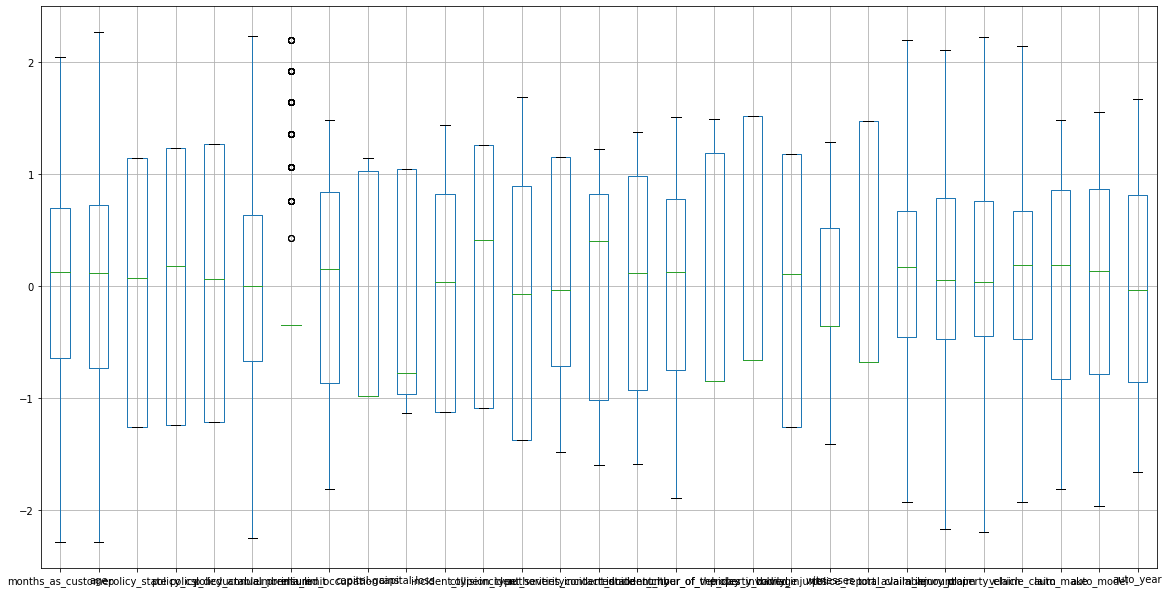

In [26]:
x_new.boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.10)
plt.show()

In [27]:
# Best random state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
maxAccu=0 # max accuracy
maxRS=0 # best random state value for which max accuracy is achieved
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train) # Fitting the data will train the model
    predrf=LR.predict(x_test) # Predicting the data # Predicted traget variable
    acc=accuracy_score(y_test,predrf) # two target varaible # accuracy score
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"on Randon_state ",maxRS)

Best accuracy is  0.837696335078534 on Randon_state  12


In [28]:
# Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=12)

In [29]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 83.7696335078534
[[147   7]
 [ 24  13]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       154
           1       0.65      0.35      0.46        37

    accuracy                           0.84       191
   macro avg       0.75      0.65      0.68       191
weighted avg       0.82      0.84      0.82       191



In [30]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 72.77486910994764
[[123  31]
 [ 21  16]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       154
           1       0.34      0.43      0.38        37

    accuracy                           0.73       191
   macro avg       0.60      0.62      0.60       191
weighted avg       0.75      0.73      0.74       191



In [31]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 82.19895287958116
[[144  10]
 [ 24  13]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.89       154
           1       0.57      0.35      0.43        37

    accuracy                           0.82       191
   macro avg       0.71      0.64      0.66       191
weighted avg       0.80      0.82      0.81       191



In [32]:
# SVC - Support Vector Classifier
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
ad_pred=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy 82.72251308900523
[[152   2]
 [ 31   6]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       154
           1       0.75      0.16      0.27        37

    accuracy                           0.83       191
   macro avg       0.79      0.57      0.58       191
weighted avg       0.81      0.83      0.78       191



In [33]:
# Cross Validation - Check Overfitting
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x_new,y_new,cv=5)
print("Cross Validation Score Of Logistic Regression Model :",scr.mean())
scr1=cross_val_score(dt,x_new,y_new,cv=5)
print("Cross Validation Score Of Decision Tree Model :",scr.mean())
scr2=cross_val_score(rf,x_new,y_new,cv=5)
print("Cross Validation Score Of Random Forest Model :",scr2.mean())
scr3=cross_val_score(svc,x_new,y_new,cv=5)
print("Cross Validation Score Of SVC Model :",scr3.mean())

Cross Validation Score Of Logistic Regression Model : 0.775993386607881
Cross Validation Score Of Decision Tree Model : 0.775993386607881
Cross Validation Score Of Random Forest Model : 0.763400385781207
Cross Validation Score Of SVC Model : 0.7633948746211078


In [34]:
# Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV
# Create parameters list to pass in GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train) # fitting the data in model
GCV.best_params_ # Printing the best parameter found by GridSearchCV
GCV_pred=GCV.best_estimator_.predict(x_test) # predicting with best parameters
accuracy_score(y_test,GCV_pred) # checking final accuracy

0.8115183246073299

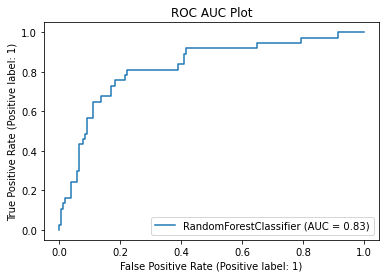

In [35]:
# ROC AUC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

In [36]:
# Final accuracy is 81% & AUC score is 83%

In [37]:
I=np.array(y_test) # Conclusion
predicted=np.array(rf.predict(x_test))
Insurance=pd.DataFrame({'Original_Data':I,'Predicted_Data':predicted},index=range(len(I)))
Insurance

,Original_Data,Predicted_Data
0,0,0
1,0,0
2,1,0
3,0,0
4,0,1
5,0,0
6,0,0
7,0,0
8,1,0
9,1,0


In [38]:
# Model Saving
import pickle
filename = 'Insurance Claims- Fraud Detection.pkl'
pickle.dump(rf,open(filename,'wb'))

# Thank You....!!!